In [40]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
import pickle
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score,precision_recall_curve

In [41]:
celebDf  = pd.read_csv("Celeb.csv")
usDf = pd.read_csv("Hamza.csv")

In [42]:
#Get Celeb data and then your image data
#Concatnate the two dataframes to get a joint train, test split
celeb_train, celeb_test = train_test_split(celebDf, test_size=0.3, random_state = 8)
us_train, us_test = train_test_split(usDf, test_size=0.3, random_state = 8)

frames = [celeb_train, us_train]
train = pd.concat(frames)

frames = [celeb_test, us_test]
test = pd.concat(frames)

In [43]:
#Seperate the y_train and y_test. 
#We can have different objectives/y
y1_train = train["Identity"].to_numpy()
y2_train = train["Expression"].to_numpy()
y3_train = train["Age"].to_numpy()
y1_test = test["Identity"].to_numpy()
y2_test = test["Expression"].to_numpy()
y3_test = test["Age"].to_numpy()

In [44]:
#Get the train set image paths and convert it into a numpy array
#train_paths = train["Path"].to_numpy()
#Iterate over each image path, open the image, convert to numpy array, resize the image, 
#and reshape it into a row vector
#Append to a list
#Convert it back to numpy array

train_paths = train["Path"]
X_train = []
for path in train_paths:
    image = cv2.imread(path)
    new_image = cv2.resize(image, (224, 224)) 
    
    X_train.append(new_image)
    
X_train = np.array(X_train)

In [45]:
#Do the same as the train split path
test_paths = test["Path"].to_numpy()

X_test = []
for path in test_paths:
    image = cv2.imread(path)
    new_image = cv2.resize(image, (224, 224)) 
    
    X_test.append(new_image)
        
X_test = np.array(X_test)

In [46]:
X_train.shape

(140, 224, 224, 3)

In [47]:
X_test.shape

(60, 224, 224, 3)

In [48]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y1_train)
y1_train_encoded = encoder.transform(y1_train)
y1_test_encoded = encoder.transform(y1_test)

In [49]:
encoder = LabelEncoder()
encoder.fit(y2_train)
y2_train_encoded = encoder.transform(y2_train)
y2_test_encoded = encoder.transform(y2_test)

In [51]:
import tensorflow as tf

In [52]:
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras import Model

In [53]:
inputs = tf.keras.layers.Input(shape = (224,224,3))
x = Conv2D(8, 3, strides = 1,  padding = "valid", activation = "relu")(inputs)
x = MaxPooling2D(2, strides = 2, padding = "valid")(x)
x = Conv2D(16, 3, strides = 2,  padding = "valid", activation = "relu")(x)
x = MaxPooling2D(2, strides = 2, padding = "valid")(x)
x = Conv2D(32, 3, strides = 2,  padding = "valid", activation = "relu")(x)
x = Conv2D(64, 3, strides = 1,  padding = "valid", activation = "relu")(x)
x = Conv2D(128, 3, strides = 1,  padding = "valid", activation = "relu")(x)

x = GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation = "relu")(x)
x = tf.keras.layers.Dense(1, activation = "sigmoid")(x)
model = Model(inputs = inputs, outputs = x)


In [54]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_27 (Conv2D)          (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 8)      0         
 2D)                                                             
                                                                 
 conv2d_28 (Conv2D)          (None, 55, 55, 16)        1168      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 27, 27, 16)       0         
 2D)                                                             
                                                                 
 conv2d_29 (Conv2D)          (None, 13, 13, 32)        4640

In [55]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.00001), loss = tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])

In [56]:
history = model.fit(X_train, y1_train_encoded, epochs = 500, batch_size = 32, validation_data = (X_test, y1_test_encoded))

Epoch 1/500
5/5 [==============================] - 2s 48ms/step - loss: 7.6970 - accuracy: 0.5000 - val_loss: 6.8113 - val_accuracy: 0.5000
Epoch 2/500
5/5 [==============================] - 0s 19ms/step - loss: 6.4446 - accuracy: 0.5000 - val_loss: 5.5345 - val_accuracy: 0.5000
Epoch 3/500
5/5 [==============================] - 0s 19ms/step - loss: 5.1110 - accuracy: 0.5000 - val_loss: 4.2576 - val_accuracy: 0.5000
Epoch 4/500
5/5 [==============================] - 0s 19ms/step - loss: 3.8220 - accuracy: 0.5000 - val_loss: 2.9968 - val_accuracy: 0.5000
Epoch 5/500
5/5 [==============================] - 0s 18ms/step - loss: 2.5640 - accuracy: 0.5000 - val_loss: 1.8469 - val_accuracy: 0.5000
Epoch 6/500
5/5 [==============================] - 0s 18ms/step - loss: 1.3858 - accuracy: 0.5000 - val_loss: 1.0156 - val_accuracy: 0.5333
Epoch 7/500
5/5 [==============================] - 0s 18ms/step - loss: 0.8386 - accuracy: 0.4857 - val_loss: 0.9503 - val_accuracy: 0.3833
Epoch 8/500
5/5 [===

5/5 [==============================] - 0s 18ms/step - loss: 0.3121 - accuracy: 0.8857 - val_loss: 0.3207 - val_accuracy: 0.8833
Epoch 60/500
5/5 [==============================] - 0s 18ms/step - loss: 0.3085 - accuracy: 0.8857 - val_loss: 0.3156 - val_accuracy: 0.8667
Epoch 61/500
5/5 [==============================] - 0s 18ms/step - loss: 0.3025 - accuracy: 0.8857 - val_loss: 0.3078 - val_accuracy: 0.9000
Epoch 62/500
5/5 [==============================] - 0s 19ms/step - loss: 0.3013 - accuracy: 0.8929 - val_loss: 0.3046 - val_accuracy: 0.8833
Epoch 63/500
5/5 [==============================] - 0s 19ms/step - loss: 0.2981 - accuracy: 0.9000 - val_loss: 0.3052 - val_accuracy: 0.9000
Epoch 64/500
5/5 [==============================] - 0s 20ms/step - loss: 0.2945 - accuracy: 0.8929 - val_loss: 0.3004 - val_accuracy: 0.8833
Epoch 65/500
5/5 [==============================] - 0s 19ms/step - loss: 0.2917 - accuracy: 0.9000 - val_loss: 0.2977 - val_accuracy: 0.8833
Epoch 66/500
5/5 [========

5/5 [==============================] - 0s 18ms/step - loss: 0.2001 - accuracy: 0.9286 - val_loss: 0.2095 - val_accuracy: 0.9667
Epoch 118/500
5/5 [==============================] - 0s 18ms/step - loss: 0.1959 - accuracy: 0.9429 - val_loss: 0.2199 - val_accuracy: 0.9167
Epoch 119/500
5/5 [==============================] - 0s 18ms/step - loss: 0.1917 - accuracy: 0.9429 - val_loss: 0.2064 - val_accuracy: 0.9667
Epoch 120/500
5/5 [==============================] - 0s 18ms/step - loss: 0.1932 - accuracy: 0.9429 - val_loss: 0.2039 - val_accuracy: 0.9667
Epoch 121/500
5/5 [==============================] - 0s 19ms/step - loss: 0.1860 - accuracy: 0.9429 - val_loss: 0.2111 - val_accuracy: 0.9167
Epoch 122/500
5/5 [==============================] - 0s 19ms/step - loss: 0.1860 - accuracy: 0.9429 - val_loss: 0.2048 - val_accuracy: 0.9333
Epoch 123/500
5/5 [==============================] - 0s 18ms/step - loss: 0.1851 - accuracy: 0.9429 - val_loss: 0.1987 - val_accuracy: 0.9667
Epoch 124/500
5/5 [=

Epoch 175/500
5/5 [==============================] - 0s 18ms/step - loss: 0.1337 - accuracy: 0.9500 - val_loss: 0.1705 - val_accuracy: 0.9500
Epoch 176/500
5/5 [==============================] - 0s 19ms/step - loss: 0.1307 - accuracy: 0.9571 - val_loss: 0.1676 - val_accuracy: 0.9500
Epoch 177/500
5/5 [==============================] - 0s 18ms/step - loss: 0.1316 - accuracy: 0.9571 - val_loss: 0.1693 - val_accuracy: 0.9500
Epoch 178/500
5/5 [==============================] - 0s 18ms/step - loss: 0.1295 - accuracy: 0.9571 - val_loss: 0.1716 - val_accuracy: 0.9500
Epoch 179/500
5/5 [==============================] - 0s 17ms/step - loss: 0.1305 - accuracy: 0.9571 - val_loss: 0.1820 - val_accuracy: 0.9333
Epoch 180/500
5/5 [==============================] - 0s 19ms/step - loss: 0.1306 - accuracy: 0.9571 - val_loss: 0.1693 - val_accuracy: 0.9500
Epoch 181/500
5/5 [==============================] - 0s 18ms/step - loss: 0.1274 - accuracy: 0.9571 - val_loss: 0.1703 - val_accuracy: 0.9500
Epoch 

Epoch 233/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0897 - accuracy: 0.9714 - val_loss: 0.1639 - val_accuracy: 0.9500
Epoch 234/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0894 - accuracy: 0.9714 - val_loss: 0.1744 - val_accuracy: 0.9500
Epoch 235/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0886 - accuracy: 0.9643 - val_loss: 0.1633 - val_accuracy: 0.9500
Epoch 236/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0881 - accuracy: 0.9643 - val_loss: 0.1661 - val_accuracy: 0.9500
Epoch 237/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0865 - accuracy: 0.9643 - val_loss: 0.1657 - val_accuracy: 0.9500
Epoch 238/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0864 - accuracy: 0.9643 - val_loss: 0.1622 - val_accuracy: 0.9500
Epoch 239/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0849 - accuracy: 0.9714 - val_loss: 0.1691 - val_accuracy: 0.9500
Epoch 

Epoch 291/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0622 - accuracy: 0.9786 - val_loss: 0.1693 - val_accuracy: 0.9500
Epoch 292/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0614 - accuracy: 0.9786 - val_loss: 0.1738 - val_accuracy: 0.9500
Epoch 293/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0635 - accuracy: 0.9786 - val_loss: 0.1746 - val_accuracy: 0.9500
Epoch 294/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0602 - accuracy: 0.9929 - val_loss: 0.1653 - val_accuracy: 0.9500
Epoch 295/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0707 - accuracy: 0.9929 - val_loss: 0.1686 - val_accuracy: 0.9500
Epoch 296/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0617 - accuracy: 0.9786 - val_loss: 0.1939 - val_accuracy: 0.9500
Epoch 297/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0618 - accuracy: 0.9786 - val_loss: 0.1718 - val_accuracy: 0.9500
Epoch 

Epoch 349/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0441 - accuracy: 0.9929 - val_loss: 0.1858 - val_accuracy: 0.9500
Epoch 350/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0437 - accuracy: 0.9857 - val_loss: 0.1951 - val_accuracy: 0.9500
Epoch 351/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0447 - accuracy: 0.9857 - val_loss: 0.1870 - val_accuracy: 0.9500
Epoch 352/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0433 - accuracy: 0.9929 - val_loss: 0.1787 - val_accuracy: 0.9500
Epoch 353/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0428 - accuracy: 0.9929 - val_loss: 0.1824 - val_accuracy: 0.9500
Epoch 354/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0425 - accuracy: 0.9929 - val_loss: 0.1875 - val_accuracy: 0.9500
Epoch 355/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0424 - accuracy: 0.9929 - val_loss: 0.1851 - val_accuracy: 0.9500
Epoch 

Epoch 407/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 0.2038 - val_accuracy: 0.9500
Epoch 408/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 0.2053 - val_accuracy: 0.9500
Epoch 409/500
5/5 [==============================] - 0s 22ms/step - loss: 0.0284 - accuracy: 1.0000 - val_loss: 0.1932 - val_accuracy: 0.9500
Epoch 410/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0288 - accuracy: 1.0000 - val_loss: 0.1980 - val_accuracy: 0.9500
Epoch 411/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 0.2099 - val_accuracy: 0.9500
Epoch 412/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 0.2074 - val_accuracy: 0.9500
Epoch 413/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0299 - accuracy: 1.0000 - val_loss: 0.1960 - val_accuracy: 0.9500
Epoch 

Epoch 465/500
5/5 [==============================] - 0s 20ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.2324 - val_accuracy: 0.9500
Epoch 466/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.2358 - val_accuracy: 0.9500
Epoch 467/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.2476 - val_accuracy: 0.9500
Epoch 468/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.2385 - val_accuracy: 0.9500
Epoch 469/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.2453 - val_accuracy: 0.9500
Epoch 470/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.2420 - val_accuracy: 0.9500
Epoch 471/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.2413 - val_accuracy: 0.9500
Epoch 

In [57]:
model.save("model_results/nn_identity_model")

INFO:tensorflow:Assets written to: model_results/nn_identity_model/assets


INFO:tensorflow:Assets written to: model_results/nn_identity_model/assets


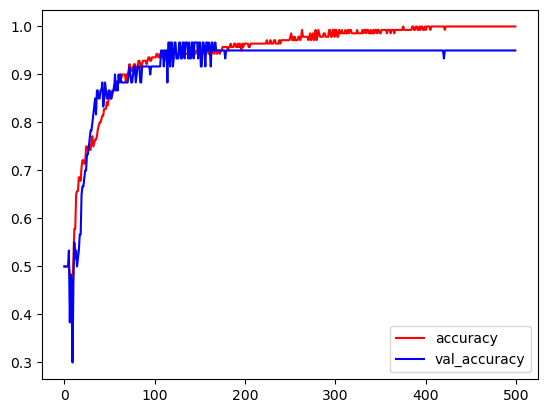

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label ='accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label ='val_accuracy')
plt.legend()
plt.show()

# Age classifier

In [59]:
inputs = tf.keras.layers.Input(shape = (224,224,3))
x = tf.keras.layers.RandomRotation(
    (-0.05, 0.05),
    fill_mode="nearest",
    interpolation="bilinear",
)(inputs)
x = Conv2D(8, 3, strides = 1,  padding = "valid", activation = "relu")(x)
x = Conv2D(16, 3, strides = 1,  padding = "valid", activation = "relu")(x)
x = MaxPooling2D(2, strides = 2, padding = "valid")(x)
x = Conv2D(32, 3, strides = 1,  padding = "valid", activation = "relu")(x)
x = Conv2D(64, 3, strides = 2,  padding = "valid", activation = "relu")(x)
x = Conv2D(128, 5, strides = 2,  padding = "valid", activation = "relu")(x)
x = Conv2D(256, 5, strides = 2,  padding = "valid", activation = "relu")(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation = "relu")(x)
x = tf.keras.layers.Dense(1, activation = "relu")(x)
model_age = Model(inputs = inputs, outputs = x)

In [60]:
model_age.compile(optimizer = tf.keras.optimizers.Adam(0.00001), loss = "mse")

In [61]:
history = model_age.fit(X_train, y3_train, epochs = 250, batch_size = 32, validation_data = (X_test, y3_test))

Epoch 1/250


5/5 [==============================] - 3s 98ms/step - loss: 1329.8381 - val_loss: 722.3755
Epoch 2/250
5/5 [==============================] - 0s 75ms/step - loss: 575.9798 - val_loss: 593.3548
Epoch 3/250
5/5 [==============================] - 0s 76ms/step - loss: 379.7802 - val_loss: 492.3150
Epoch 4/250
5/5 [==============================] - 0s 76ms/step - loss: 328.4001 - val_loss: 464.4424
Epoch 5/250
5/5 [==============================] - 0s 74ms/step - loss: 292.6460 - val_loss: 501.4480
Epoch 6/250
5/5 [==============================] - 0s 76ms/step - loss: 283.4209 - val_loss: 454.3958
Epoch 7/250
5/5 [==============================] - 0s 77ms/step - loss: 272.4195 - val_loss: 447.4913
Epoch 8/250
5/5 [==============================] - 0s 75ms/step - loss: 246.7214 - val_loss: 441.8472
Epoch 9/250
5/5 [==============================] - 0s 75ms/step - loss: 241.4773 - val_loss: 427.3344
Epoch 10/250
5/5 [==============================] - 0s 76ms/step - loss: 219.5750 - val_loss:

5/5 [==============================] - 0s 78ms/step - loss: 19.6748 - val_loss: 278.7993
Epoch 82/250
5/5 [==============================] - 0s 76ms/step - loss: 20.8862 - val_loss: 293.8343
Epoch 83/250
5/5 [==============================] - 0s 78ms/step - loss: 27.7602 - val_loss: 289.6197
Epoch 84/250
5/5 [==============================] - 0s 76ms/step - loss: 25.2109 - val_loss: 289.1450
Epoch 85/250
5/5 [==============================] - 0s 76ms/step - loss: 28.8355 - val_loss: 288.5353
Epoch 86/250
5/5 [==============================] - 0s 78ms/step - loss: 23.1143 - val_loss: 284.0180
Epoch 87/250
5/5 [==============================] - 0s 77ms/step - loss: 20.7291 - val_loss: 298.8373
Epoch 88/250
5/5 [==============================] - 0s 76ms/step - loss: 19.4441 - val_loss: 283.4618
Epoch 89/250
5/5 [==============================] - 0s 77ms/step - loss: 20.5366 - val_loss: 284.4391
Epoch 90/250
5/5 [==============================] - 0s 76ms/step - loss: 15.2235 - val_loss: 29

5/5 [==============================] - 0s 78ms/step - loss: 3.3070 - val_loss: 286.4593
Epoch 162/250
5/5 [==============================] - 0s 79ms/step - loss: 2.8644 - val_loss: 286.7682
Epoch 163/250
5/5 [==============================] - 0s 77ms/step - loss: 2.1439 - val_loss: 288.2387
Epoch 164/250
5/5 [==============================] - 0s 77ms/step - loss: 3.2362 - val_loss: 284.7130
Epoch 165/250
5/5 [==============================] - 0s 79ms/step - loss: 2.7773 - val_loss: 285.6741
Epoch 166/250
5/5 [==============================] - 0s 77ms/step - loss: 2.2684 - val_loss: 287.0675
Epoch 167/250
5/5 [==============================] - 0s 77ms/step - loss: 2.9104 - val_loss: 286.8921
Epoch 168/250
5/5 [==============================] - 0s 76ms/step - loss: 5.1802 - val_loss: 281.4643
Epoch 169/250
5/5 [==============================] - 0s 78ms/step - loss: 3.9127 - val_loss: 279.8318
Epoch 170/250
5/5 [==============================] - 0s 78ms/step - loss: 3.2089 - val_loss: 280

5/5 [==============================] - 0s 77ms/step - loss: 1.6778 - val_loss: 288.5788
Epoch 242/250
5/5 [==============================] - 0s 77ms/step - loss: 1.1857 - val_loss: 288.1480
Epoch 243/250
5/5 [==============================] - 0s 79ms/step - loss: 1.4455 - val_loss: 288.6842
Epoch 244/250
5/5 [==============================] - 0s 78ms/step - loss: 0.9324 - val_loss: 287.9655
Epoch 245/250
5/5 [==============================] - 0s 77ms/step - loss: 1.7343 - val_loss: 286.2178
Epoch 246/250
5/5 [==============================] - 0s 77ms/step - loss: 1.0801 - val_loss: 284.4346
Epoch 247/250
5/5 [==============================] - 0s 78ms/step - loss: 1.3774 - val_loss: 287.3799
Epoch 248/250
5/5 [==============================] - 0s 78ms/step - loss: 1.3007 - val_loss: 287.6403
Epoch 249/250
5/5 [==============================] - 0s 78ms/step - loss: 1.4760 - val_loss: 285.9500
Epoch 250/250
5/5 [==============================] - 0s 78ms/step - loss: 1.1442 - val_loss: 284

In [62]:
model_age.save("model_results/nn_age_model")

INFO:tensorflow:Assets written to: model_results/nn_age_model/assets


INFO:tensorflow:Assets written to: model_results/nn_age_model/assets


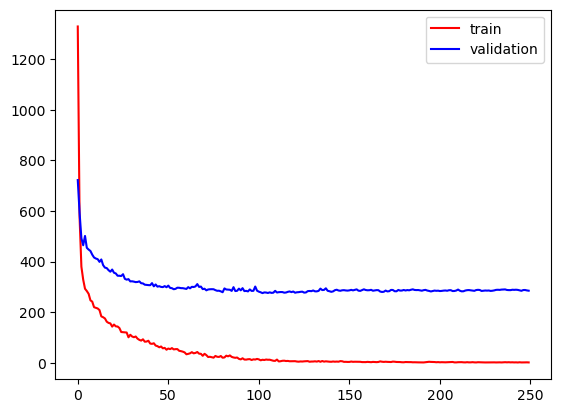

In [63]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color = 'red', label ='train')
plt.plot(history.history['val_loss'], color = 'blue', label ='validation')
plt.legend()
plt.show()

# Expression classifier

In [64]:
inputs = tf.keras.layers.Input(shape = (224,224,3))

x = Conv2D(8, 3, strides = 1,  padding = "valid", activation = "relu")(inputs)
x = MaxPooling2D(2, strides = 2, padding = "valid")(x)
x = Conv2D(16, 3, strides = 2,  padding = "valid", activation = "relu")(x)
x = MaxPooling2D(2, strides = 2, padding = "valid")(x)
x = Conv2D(32, 3, strides = 2,  padding = "valid", activation = "relu")(x)
x = Conv2D(64, 3, strides = 1,  padding = "valid", activation = "relu")(x)
x = Conv2D(128, 3, strides = 1,  padding = "valid", activation = "relu")(x)

x = GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation = "relu")(x)
x = tf.keras.layers.Dense(128, activation = "relu")(x)
x = tf.keras.layers.Dense(3, activation = "softmax")(x)
model_expression = Model(inputs = inputs, outputs = x)

In [65]:
model_expression.compile(optimizer = tf.keras.optimizers.Adam(0.00001), loss =  "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [66]:
my_callback = tf.keras.callbacks.ModelCheckpoint(
    "model_results/nn_expression_model",
    monitor= "val_accuracy",
    verbose = 0,
    save_best_only =  True,
    save_weights_only = False,
    mode = "auto",
    save_freq="epoch"
)


cbacks = [my_callback]

In [68]:
history = model_expression.fit(X_train, y2_train_encoded, epochs = 100, batch_size = 32, validation_data = (X_test, y2_test_encoded), callbacks = cbacks)

Epoch 1/100
5/5 [==============================] - 0s 27ms/step - loss: 0.4908 - accuracy: 0.7857 - val_loss: 0.6904 - val_accuracy: 0.6667
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 0.4876 - accuracy: 0.8143 - val_loss: 0.6960 - val_accuracy: 0.6167
Epoch 3/100
5/5 [==============================] - 0s 19ms/step - loss: 0.4940 - accuracy: 0.8143 - val_loss: 0.6966 - val_accuracy: 0.6167
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 0.5112 - accuracy: 0.7643 - val_loss: 0.6905 - val_accuracy: 0.6500
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 0.5017 - accuracy: 0.7929 - val_loss: 0.7317 - val_accuracy: 0.5500
Epoch 6/100
5/5 [==============================] - 0s 19ms/step - loss: 0.4962 - accuracy: 0.8429 - val_loss: 0.6864 - val_accuracy: 0.6500
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 0.4898 - accuracy: 0.7571 - val_loss: 0.6873 - val_accuracy: 0.6500
Epoch 8/100
5/5 [===

5/5 [==============================] - 0s 19ms/step - loss: 0.4530 - accuracy: 0.8643 - val_loss: 0.7120 - val_accuracy: 0.6167
Epoch 60/100
5/5 [==============================] - 0s 19ms/step - loss: 0.4404 - accuracy: 0.8214 - val_loss: 0.6978 - val_accuracy: 0.6833
Epoch 61/100
5/5 [==============================] - 0s 19ms/step - loss: 0.4444 - accuracy: 0.8500 - val_loss: 0.7037 - val_accuracy: 0.6333
Epoch 62/100
5/5 [==============================] - 0s 18ms/step - loss: 0.4359 - accuracy: 0.8714 - val_loss: 0.6953 - val_accuracy: 0.6500
Epoch 63/100
5/5 [==============================] - 0s 19ms/step - loss: 0.4349 - accuracy: 0.8571 - val_loss: 0.6954 - val_accuracy: 0.6667
Epoch 64/100
5/5 [==============================] - 0s 18ms/step - loss: 0.4344 - accuracy: 0.8786 - val_loss: 0.6980 - val_accuracy: 0.6500
Epoch 65/100
5/5 [==============================] - 0s 19ms/step - loss: 0.4287 - accuracy: 0.8571 - val_loss: 0.6923 - val_accuracy: 0.6500
Epoch 66/100
5/5 [========

In [69]:
model_expression.load_weights("model_results/nn_expression_model")

2023-06-22 12:13:34.643544: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open model_results/nn_expression_model: FAILED_PRECONDITION: model_results/nn_expression_model; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


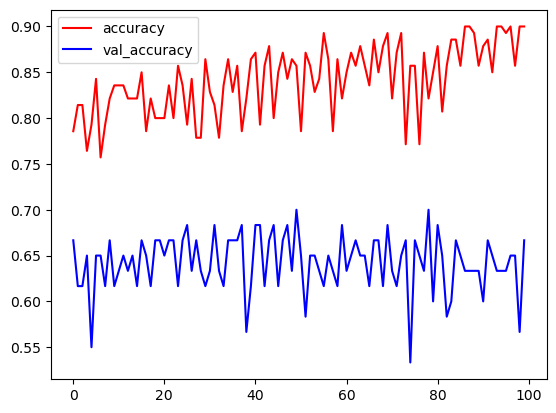

In [70]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label ='accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label ='val_accuracy')
plt.legend()
plt.show()

# SVM 

# Data loading Flattened for SVM

In [71]:
celebDf  = pd.read_csv("Celeb.csv")
usDf = pd.read_csv("Hamza.csv")

#Get Celeb data and then your image data
#Concatnate the two dataframes to get a joint train, test split
celeb_train, celeb_test = train_test_split(celebDf, test_size=0.3, random_state = 8)
us_train, us_test = train_test_split(usDf, test_size=0.3, random_state = 8)

frames = [celeb_train, us_train]
train = pd.concat(frames)

frames = [celeb_test, us_test]
test = pd.concat(frames)

#Seperate the y_train and y_test. 
#We can have different objectives/y
y1_train = train["Identity"].to_numpy()
y2_train = train["Expression"].to_numpy()
y3_train = train["Age"].to_numpy()
y1_test = test["Identity"].to_numpy()
y2_test = test["Expression"].to_numpy()
y3_test = test["Age"].to_numpy()

In [72]:
train_paths = train["Path"]
X_train = []
for path in train_paths:
    image = cv2.imread(path)
    new_image = cv2.resize(image, (224, 224)) 
    rows, columns, channels = new_image.shape
    new_image = new_image.reshape(rows * columns * channels)
    X_train.append(new_image)
    
X_train = np.array(X_train)

In [73]:
#Do the same as the train split path
test_paths = test["Path"].to_numpy()

X_test = []
for path in test_paths:
    image = cv2.imread(path)
    new_image = cv2.resize(image, (224, 224)) 
    rows, columns, channels = new_image.shape
    new_image = new_image.reshape(rows * columns * channels)
    
    X_test.append(new_image)
        
X_test = np.array(X_test)

# SVM on Identity

In [74]:
from sklearn.svm import SVC

In [75]:
svm_identity = SVC(kernel = "rbf", random_state=8, tol=1e-5, C = 2, max_iter = 1000)
svm_identity.fit(X_train, y1_train)

SVC(C=2, max_iter=1000, random_state=8, tol=1e-05)

In [76]:
preds = svm_identity.predict(X_test)

In [77]:
ac_score = accuracy_score(preds, y1_test)
f1 = f1_score(preds, y1_test, pos_label='Hamza Ahmad')
print("Accuracy:", ac_score)
print("F1 Score:", f1)

Accuracy: 0.8833333333333333
F1 Score: 0.8771929824561403


# Expression on SVM

In [78]:
svm_expression = SVC(kernel = "rbf", decision_function_shape = "ovr", tol=1e-3, C = 3, max_iter = 1000, random_state = 8)
svm_expression.fit(X_train, y2_train)

SVC(C=3, max_iter=1000, random_state=8)

In [79]:
preds = svm_expression.predict(X_test)

In [80]:
ac_score = accuracy_score(preds, y2_test)
f1 = f1_score(preds, y2_test, average = "micro")
print("Accuracy:", ac_score)
print("F1 Score:", f1)

Accuracy: 0.7
F1 Score: 0.7


In [81]:
pickle.dump(svm_identity, open("model_results/svm_identity_model", "wb")) 
pickle.dump(svm_expression, open("model_results/svm_expression_model", "wb")) 

# Best hyperparameters for Identity SVM

## Kernel: rbf and C = 2

# Best hyperparameters for Expression SVM

## Kernel: rbf and C = 3